<a href="https://colab.research.google.com/github/Antu0/Computational-Geoscience/blob/main/CG_Toothian_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches


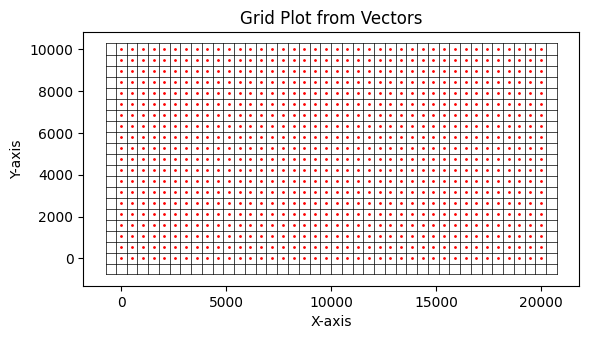

In [27]:
#  Define the Parameters for the water table configuration
a, d, l = 50, 0.02, 5000  # Water table parameters
b = 2 * np.pi / l  # Wave number

#  Creae Grids and calculate the sinusoidal water table
nx, nz = 40, 20  # Grid points in x and z directions
Lx, Lz = 20000, 10000  # Domain dimensions (m)
dx, dz = Lx / nx, Lz / nz  # Grid spacings
x = np.linspace(0, Lx, nx)
z = np.linspace(0, Lz, nz)
ht = Lz + x * d + a * (np.sin((b * x) / np.cos(d)) / np.cos(d))

# Hydraulic head matrix --------------------------------------------------
# Modify the x array: Add one value at the beginning and one at the end
x_new = np.concatenate(([x[0] - dx], x, [x[-1] + dx]))
# Modify the z array: Add one value at the end
z_new = np.concatenate(([z[0]-dz], z))
H = np.zeros((nz + 1, nx + 2))
H[0, 1:nx + 1] = ht  # Surface boundary condition

# Let's plot the grid
# Generate the grid
x_edges = np.concatenate(([x_new[0] - dx / 2], x_new + dx / 2))
z_edges = np.concatenate(([z_new[0] - dz / 2], z_new + dz / 2))

X_cen, Z_cen = np.meshgrid(x, z)
X, Z = np.meshgrid(x_edges, z_edges)
# Plot the grid

#  Plotting the grid with colors based on H
plt.figure(0)
plt.plot(X_cen, Z_cen, 'ro', markersize=1)  # Plot grid points
for i in range(len(x_edges)):  # Plot vertical lines
    plt.plot([x_edges[i], x_edges[i]], [
             z_edges[0], z_edges[-1]], 'k-', linewidth=0.5)
for j in range(len(z_edges)):  # Plot horizontal lines
    plt.plot([x_edges[0], x_edges[-1]],
             [z_edges[j], z_edges[j]], 'k-', linewidth=0.5)

# Plot the centers
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Grid Plot from Vectors")
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio
plt.show()


plt.show()


In [28]:
# %% Gauss-Seidel iteration -------------------------------------------------
tolerance, max_iter = 1e-3, 50000  # Convergence criteria
for iteration in range(1, max_iter + 1):
    H[nz, :] = H[nz - 1, :]  # No-flow at bottom
    H[:, 0] = H[:, 1]        # No-flow at left
    H[:, nx + 1] = H[:, nx]  # No-flow at right

    H_old = H.copy()

    for i in range(1, nz):
        for j in range(1, nx + 1):
            H[i, j] = (
                ((H[i - 1, j] + H[i + 1, j]) * dz**2 +
                 (H[i, j - 1] + H[i, j + 1]) * dx**2)
                / (2 * (dx**2 + dz**2))
            )

    if np.max(np.abs(H - H_old)) < tolerance:
        print(f"Converged in {iteration} iterations.")
        break

# %% Extract head data for plotting -------------------------------------
Hplot = H[0:nz, 1:nx + 1]

# Compute gradients for streamlines
dH_dx, dH_dz = np.gradient(Hplot[::-1], dx, dz)



Converged in 3400 iterations.


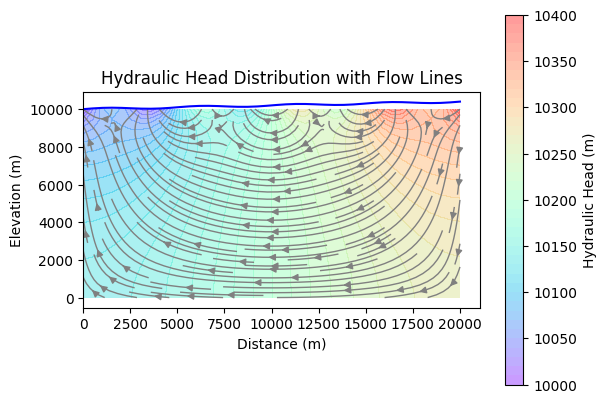

In [29]:
# %% Plotting with streamlines
cmap = cm.rainbow
plt.figure(1)
plt.title("Hydraulic Head Distribution with Flow Lines")
# Contour lines for hydraulic head
contour_levels = np.arange(np.nanmin(Hplot), np.nanmax(Hplot), 10)
plt.contourf(x, z[::-1], Hplot, levels=contour_levels, cmap=cmap, alpha=0.4)
plt.colorbar(label="Hydraulic Head (m)")
plt.xlabel("Distance (m)")
plt.ylabel("Elevation (m)")
# Reverse the direction of streamlines without affecting the y-axis of the image
plt.streamplot(x, z, -dH_dz, -dH_dx, color="grey", linewidth=1, density=1.2)
# Overlay the sinusoidal water table
plt.plot(x, ht, color="blue")
# plt.legend()
# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot without flipping the y-axis
plt.show()

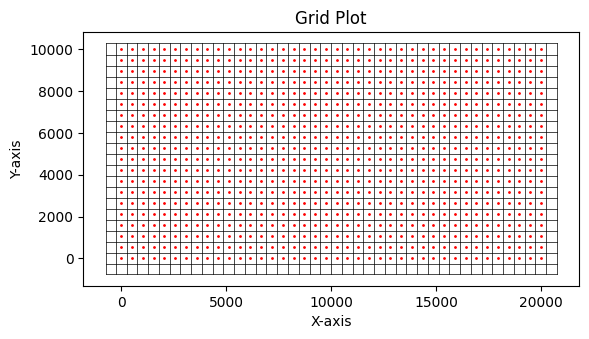

In [30]:
#  Define Parameters for Water Table
a, d, l = 50, 0.02, 5000
b = 2 * np.pi / l

nx, nz = 40, 20
Lx, Lz = 20000, 10000
dx, dz = Lx / nx, Lz / nz
x = np.linspace(0, Lx, nx)
z = np.linspace(0, Lz, nz)
ht = Lz + x * d + a * (np.sin((b * x) / np.cos(d)) / np.cos(d))

#  Extended Grid
x_new = np.concatenate(([x[0] - dx], x, [x[-1] + dx]))
z_new = np.concatenate(([z[0]-dz], z))
H = np.zeros((nz + 1, nx + 2))
H[0, 1:nx + 1] = ht  # top boundary

#  Grid Plot
x_edges = np.concatenate(([x_new[0] - dx / 2], x_new + dx / 2))
z_edges = np.concatenate(([z_new[0] - dz / 2], z_new + dz / 2))
X_cen, Z_cen = np.meshgrid(x, z)
X, Z = np.meshgrid(x_edges, z_edges)
plt.figure(0)
plt.plot(X_cen, Z_cen, 'ro', markersize=1)
for i in range(len(x_edges)):
    plt.plot([x_edges[i], x_edges[i]], [z_edges[0], z_edges[-1]], 'k-', linewidth=0.5)
for j in range(len(z_edges)):
    plt.plot([x_edges[0], x_edges[-1]], [z_edges[j], z_edges[j]], 'k-', linewidth=0.5)
plt.xlabel("X-axis"); plt.ylabel("Y-axis")
plt.title("Grid Plot")
plt.gca().set_aspect('equal')
plt.show()

#  Define Inhomogeneous K Field
K1, K2 = 10.0, 1.0
K = np.full(H.shape, K1)
rect_Lx, rect_Lz = 0.70 * Lx, 0.20 * Lz
x_min_rect = (Lx / 2) - (rect_Lx / 2)
x_max_rect = (Lx / 2) + (rect_Lx / 2)
z_min_rect = (Lz / 2) - (rect_Lz / 2)
z_max_rect = (Lz / 2) + (rect_Lz / 2)

col_idx = np.where((x_new >= x_min_rect) & (x_new <= x_max_rect))[0]
row_idx = np.where((z_new >= z_min_rect) & (z_new <= z_max_rect))[0]
if len(col_idx) > 0 and len(row_idx) > 0:
    K[np.ix_(row_idx, col_idx)] = K2
else:
    print("Warning: Rectangle outside the domain.")

#  Mean functions
def harmonic_mean(a, b):
    return (2 * a * b) / (a + b)

def arithmetic_mean(a, b):
    return 0.5 * (a + b)



In [31]:
#  Iterative Solver
tolerance, max_iter = 1e-3, 50000
for iteration in range(1, max_iter + 1):
    H[nz, :] = H[nz - 1, :]
    H[:, 0] = H[:, 1]
    H[:, nx + 1] = H[:, nx]

    H_old = H.copy()

    for i in range(1, nz):
        for j in range(1, nx + 1):
            K_W = arithmetic_mean(K[i, j], K[i, j-1])
            K_E = arithmetic_mean(K[i, j], K[i, j+1])
            K_N = harmonic_mean(K[i, j], K[i-1, j])
            K_S = harmonic_mean(K[i, j], K[i+1, j])

            numerator = (
                (K_W / dx**2) * H[i, j-1] +
                (K_E / dx**2) * H[i, j+1] +
                (K_N / dz**2) * H[i-1, j] +
                (K_S / dz**2) * H[i+1, j]
            )
            denominator = (
                (K_W + K_E) / dx**2 + (K_N + K_S) / dz**2
            )
            H[i, j] = numerator / denominator

    if np.max(np.abs(H - H_old)) < tolerance:
        print(f"Converged in {iteration} iterations.")
        break



Converged in 4815 iterations.


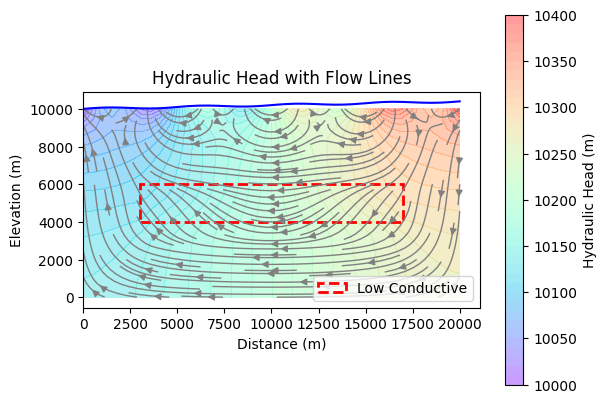

In [32]:
#  Plot Results

Hplot = H[0:nz, 1:nx + 1]
dH_dx, dH_dz = np.gradient(Hplot[::-1], dx, dz)

plt.figure(1)
plt.title("Hydraulic Head with Flow Lines")
contour_levels = np.arange(np.nanmin(Hplot), np.nanmax(Hplot), 10)
plt.contourf(x, z[::-1], Hplot, levels=contour_levels, cmap=cm.rainbow, alpha=0.4)
plt.colorbar(label="Hydraulic Head (m)")
plt.xlabel("Distance (m)"); plt.ylabel("Elevation (m)")
# Rectangle outline
rect = patches.Rectangle((x_min_rect, z_min_rect),rect_Lx,rect_Lz,linewidth=2,edgecolor='red',facecolor='none',linestyle='--',label='Low Conductive')
plt.gca().add_patch(rect)

plt.streamplot(x, z, -dH_dz, -dH_dx, color="grey", linewidth=1, density=1.2)
plt.plot(x, ht, color="blue")
plt.legend(loc='lower right')
plt.gca().set_aspect('equal')
plt.show()